In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# tickers = yf.Tickers('SYM GXO AUTO.OL KARN.SW ZBRA KGX.DE ABBN.SW CGNX 6383.T MANH')
tickers = yf.Tickers('GF.SW AWK ECL VLTO BMI XYL') # Tickers of Giacomo
# tickers = yf.Tickers('GF AWK ECL VLTO BMI XYL NEE IBE.MC FSLR ENPH VWS.CO SGRE.MC BEP ORSTED.CO BKW.SW ENR')

In [293]:
df = tickers.download(period="2y")

[*********************100%***********************]  6 of 6 completed


In [294]:

# Initialize list to store company data
company_data = []

# Loop through each ticker
for ticker in tickers.symbols:
    # Get ticker object
    t = yf.Ticker(ticker)
    
    # Get info and historical data
    info = t.info
    # hist = t.history(period="2y")
    hist = t.history(start = '2024-01-01', end = '2024-12-31')

    # Calculate required metrics
    company_name = info.get('shortName', 'N/A')
    description = info.get('longBusinessSummary', 'N/A')
    market_cap = round(info.get('marketCap', 0) / 1e9, 2) if info.get('marketCap') else 'N/A'  # In billion USD
    volume = round(hist['Volume'].mean() / 1e6, 2) if 'Volume' in hist else 'N/A'  # In million shares
    start_of_period = hist.loc[hist.index[0], 'Close'] if not hist.empty else 'N/A'
    end_of_period = hist.loc[hist.index[-1], 'Close'] if not hist.empty else 'N/A'
    
    # Calculate deltas
    delta_this_year = ((end_of_period - start_of_period) / start_of_period * 100) if start_of_period != 'N/A' else 'N/A'
    delta_last_year = 'N/A'  # Placeholder if data not fetched for previous year
    delta_total = delta_this_year  # Adjust as needed when more data is available

    # Append to company data
    company_data.append([
        ticker,
        company_name,
        description,
        f"${market_cap}B" if market_cap != 'N/A' else 'N/A',
        f"{volume}M" if volume != 'N/A' else 'N/A',
        round(delta_this_year, 2) if delta_this_year != 'N/A' else 'N/A',
        delta_last_year,
        delta_total
    ])

# Create DataFrame
columns = ["Ticker", "Company Name", "Description", "Market Cap (USD)", "Avg Daily Volume (M)", "Delta This Year (%)", "Delta Last Year (%)", "Delta Total (%)"]
df_summary = pd.DataFrame(company_data, columns=columns)

In [295]:
df_summary

,Ticker,Company Name,Description,Market Cap (USD),Avg Daily Volume (M),Delta This Year (%),Delta Last Year (%),Delta Total (%)
0,GF,"New Germany Fund, Inc. (The)",The New Germany Fund Inc. is a closed ended eq...,$0.17B,0.03M,-9.32,N/A,-9.316576
1,AWK,"American Water Works Company, I","American Water Works Company, Inc., through it...",$27.48B,1.2M,-4.82,N/A,-4.822909
2,ECL,Ecolab Inc.,"Ecolab Inc. provides water, hygiene, and infec...",$71.58B,1.09M,19.48,N/A,19.482805
3,VLTO,Veralto Corp,"Veralto Corporation provides water analytics, ...",$24.23B,1.51M,26.25,N/A,26.252693
4,BMI,"Badger Meter, Inc.","Badger Meter, Inc. manufactures and markets fl...",$5.67B,0.18M,37.87,N/A,37.865368
5,XYL,Xylem Inc.,"Xylem Inc., together with its subsidiaries, en...",$29.9B,1.24M,3.43,N/A,3.425050


In [296]:
# Display the data
df

Price            Close                                                \
Ticker             AWK         BMI         ECL         GF       VLTO   
Date                                                                   
2023-03-27  135.547363  116.546394  156.862137   8.583572        NaN   
2023-03-28  135.107269  117.187950  156.832748   8.603239        NaN   
2023-03-29  137.900879  118.323006  158.839920   8.662231        NaN   
2023-03-30  139.575150  118.194702  159.867966   8.780219        NaN   
2023-03-31  140.149185  120.237808  162.070953   8.937535        NaN   
...                ...         ...         ...        ...        ...   
2025-03-20  141.809998  196.630005  251.940002  10.420000  98.139999   
2025-03-21  141.130005  189.490005  251.000000  10.250000  97.769997   
2025-03-24  139.699997  194.179993  252.619995  10.290000  98.260002   
2025-03-25  139.160004  195.750000  251.199997  10.320000  97.750000   
2025-03-26  140.979996  192.889999  252.360001  10.200000  97.870003   

Price                  Dividends                 ... Stock Splits            \
Ticker             XYL       AWK  BMI  ECL   GF  ...          ECL   GF VLTO   
Date                                             ...                          
2023-03-27   97.060966       0.0  0.0  0.0  0.0  ...          0.0  0.0  NaN   
2023-03-28   97.607742       0.0  0.0  0.0  0.0  ...          0.0  0.0  NaN   
2023-03-29   99.082047       0.0  0.0  0.0  0.0  ...          0.0  0.0  NaN   
2023-03-30   99.980316       0.0  0.0  0.0  0.0  ...          0.0  0.0  NaN   
2023-03-31  102.225960       0.0  0.0  0.0  0.0  ...          0.0  0.0  NaN   
...                ...       ...  ...  ...  ...  ...          ...  ...  ...   
2025-03-20  119.839996       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0   
2025-03-21  118.470001       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0   
2025-03-24  120.800003       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0   
2025-03-25  123.089996       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0   
2025-03-26  123.019897       0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0   

Price             Volume                                               
Ticker      XYL      AWK     BMI      ECL      GF       VLTO      XYL  
Date                                                                   
2023-03-27  0.0   861200   49900   926700    3400        NaN  1365700  
2023-03-28  0.0   675500   63400   690700   12300        NaN  1301700  
2023-03-29  0.0   608800   88800  1075700    6800        NaN  1452500  
2023-03-30  0.0   766900   58100   732400   10000        NaN   949300  
2023-03-31  0.0  1060700  110000  1716300    5100        NaN  2059400  
...         ...      ...     ...      ...     ...        ...      ...  
2025-03-20  0.0  1387300  206900  1179700  125500  1061800.0  1329200  
2025-03-21  0.0  2607200  918500  3034100   45700  2879700.0  2663500  
2025-03-24  0.0  1093100  323900  1470400   77600  1094000.0  2251800  
2025-03-25  0.0  1729400  252200  1106900   55800  1201900.0  1745400  
2025-03-26  0.0   574436   71824   630383    5210   378381.0   638146  

[502 rows x 42 columns]

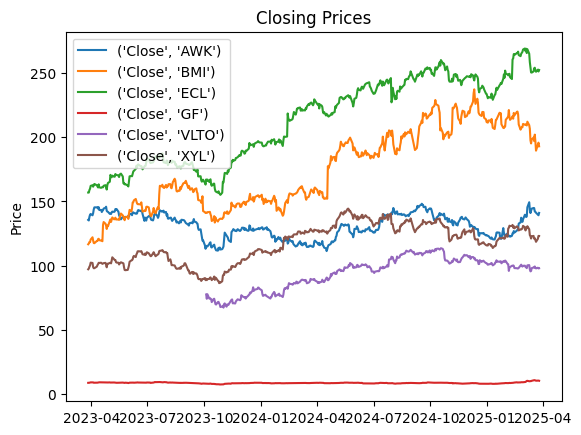

In [297]:
# Plot closing prices
plt.plot(df['Close'])
plt.legend(df.columns)
plt.title('Closing Prices')
plt.ylabel('Price')
plt.show()

In [298]:
df_normalized_closed = df['Close'] / df['Close'].iloc[0]
df_normalized_closed

Ticker,AWK,BMI,ECL,GF,VLTO,XYL
Date,,,,,,
2023-03-27,1.000000,1.000000,1.000000,1.000000,NaN,1.000000
2023-03-28,0.996753,1.005505,0.999813,1.002291,NaN,1.005633
2023-03-29,1.017363,1.015244,1.012608,1.009164,NaN,1.020823
2023-03-30,1.029715,1.014143,1.019162,1.022910,NaN,1.030077
2023-03-31,1.033950,1.031673,1.033206,1.041237,NaN,1.053214
...,...,...,...,...,...,...
2025-03-20,1.046203,1.687139,1.606124,1.213947,NaN,1.234688
2025-03-21,1.041186,1.625876,1.600131,1.194141,NaN,1.220573
2025-03-24,1.030636,1.666118,1.610459,1.198802,NaN,1.244579


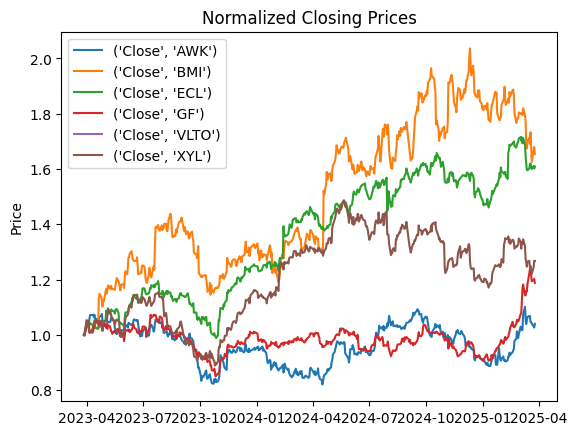

In [299]:
# Plot normalized closing prices
plt.plot(df_normalized_closed)
plt.legend(df.columns)
plt.title('Normalized Closing Prices')
plt.ylabel('Price')
plt.show()

This plot shows why we cannot weight stocks equally. Some stocks are more volatile than others.

In [300]:
# Add a new column to the DataFrame with daily differences
df_diff = df['Close'].diff()
# Drop the first row (NaN)
df_diff = df_diff.dropna()
df_diff

Ticker,AWK,BMI,ECL,GF,VLTO,XYL
Date,,,,,,
2023-10-05,-0.598991,-0.118820,-1.152313,-0.049240,-3.333626,-1.061432
2023-10-06,0.115936,0.623886,1.083359,0.098478,3.512749,0.815727
2023-10-09,1.883934,0.039597,-1.831894,-0.078783,-3.353539,0.117943
2023-10-10,1.024078,0.178253,1.428116,0.128023,0.388100,0.845215
2023-10-11,0.347801,-1.861710,0.610641,0.029543,-0.527405,0.412788
...,...,...,...,...,...,...
2025-03-20,-0.240005,-5.360001,-2.179993,-0.200000,-1.120003,-1.470001
2025-03-21,-0.679993,-7.139999,-0.940002,-0.170000,-0.370003,-1.369995
2025-03-24,-1.430008,4.689987,1.619995,0.040000,0.490005,2.330002


In [301]:
# Add a new column 'Volatility' to DataFrame df_mini
# Calculate the volatility of each stock in the past year based on normalized closing prices
df_mini = pd.DataFrame()

df_mini['Volatility'] = df_diff.pct_change().std()

df_mini

c:\Users\Admin\anaconda3\envs\ENV_FINANCE\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Admin\anaconda3\envs\ENV_FINANCE\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Volatility
Ticker,
AWK,NaN
BMI,19.232065
ECL,12.748176
GF,NaN
VLTO,NaN
XYL,27.875097


In [302]:
# Calculate final weighting based on volatility 
df_mini['Inverse Volatility'] = 1 / df_mini['Volatility']
sum_inverse_volatility = df_mini['Inverse Volatility'].sum()
df_mini['Volatility Weighting'] = df_mini['Inverse Volatility'] / sum_inverse_volatility
df_mini


,Volatility,Inverse Volatility,Volatility Weighting
Ticker,,,
AWK,NaN,NaN,NaN
BMI,19.232065,0.051996,0.312642
ECL,12.748176,0.078443,0.471655
GF,NaN,NaN,NaN
VLTO,NaN,NaN,NaN
XYL,27.875097,0.035874,0.215703


In [303]:
# Calculate sum of final weighting to verify correctness
sum_final_weighting = df_mini['Volatility Weighting'].sum()
sum_final_weighting

np.float64(0.9999999999999998)